# Decision Making for Marketing

Given two markets, which should be the focus for an E-Learning company's advertisement campaign? 

In [143]:
import pandas as pd
import numpy as np

In [144]:
raw_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [145]:
raw_df.shape

(18175, 136)

In [146]:
raw_df.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

In [147]:
interest_col = ['Age','CountryLive','ExpectedEarning',
                'FirstDevJob', 'HoursLearning','Income',
               'JobRelocateYesNo','JobRoleInterest',
                'MoneyForLearning', 'MonthsProgramming', 'SchoolMajor',
               'SchoolDegree']
df = raw_df[interest_col]


Ready-made data was used from a 2017 freeCodeCamp survey. Some 20,000 respondents were asked about their background, experience, and expectations of coding. 

https://github.com/freeCodeCamp/2017-new-coder-survey

Columns of interest were selected based on relevancy to the goal question at hand and their usefulness in filtering to our relevant populations of interest.

In [148]:
job_interests = df['JobRoleInterest'].value_counts(normalize=True).sort_values(ascending=False) * 100
job_interests.head(10)

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

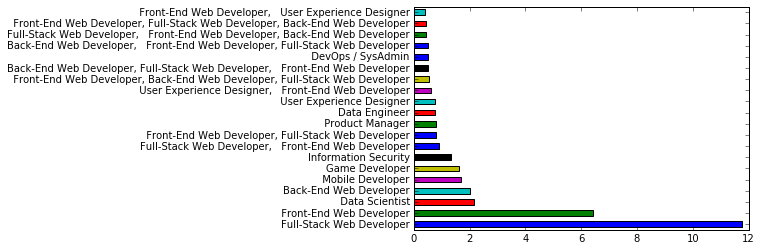

In [150]:
job_interests.head(20).plot.barh()

The focus of our company is on web and mobile development. From the data above we can tell the following:

* People are interested in more than one subject, however around 27% of people selected just one subject.

But how many people are interested in Web/Mobile Development regardless of whether they selected 1 or more interests?

In [206]:
job_interests2 = df.dropna(subset=['JobRoleInterest'])
job_interests2 = job_interests2['JobRoleInterest'].str.contains('Web Developer|Mobile Developer').value_counts(normalize=True) * 100
job_interests2

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

([<matplotlib.axis.XTick at 0x7f67bdb0a438>,
 <a list of 2 Text xticklabel objects>)

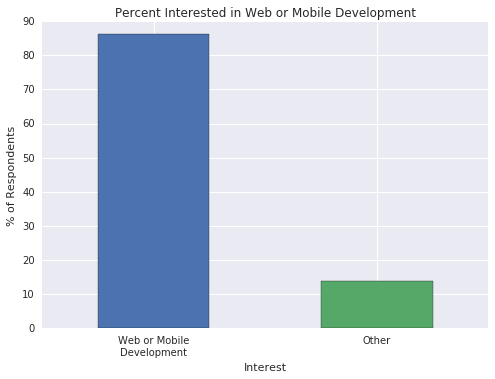

In [205]:
job_interests2.plot.bar()
plt.title('Percent Interested in Web or Mobile Development')
plt.xlabel('Interest')
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Web or Mobile\nDevelopment','Other'], rotation=0)

86% of respondents were interested in on our the topics our company teaches.

In the next analysis NaN responders to ```JobRoleInterest``` are dropped, since their interests are unknown.

In [151]:
df_nona = df.dropna(axis=0, subset=['JobRoleInterest'])

In [152]:
df_nona['CountryLive'].value_counts().head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [153]:
df_nona['CountryLive'].value_counts(normalize=True).head(10)*100

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

Based on the above tables, United States and India are the top two countries of location, with the United States making up 45% of respondents. Given the big differences in the two country, it is useful to dive deeper into our population's data.

The data is next filtered by:

* Willingness to spend: our company charges $59/month, so the population of interest should be willing to spend to learn.
* Location: the official language of the top four countries in the survey (United States, India, United Kingdom, Canada) is English, our company teaches in English.

In [154]:
# Replace 0 months with 1, to avoid dividing by 0 in the next cell
df_nona['MonthsProgramming'] = df_nona['MonthsProgramming'].apply(lambda x: 1 if x == 0 else x)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [155]:
# The average spent per month
df_nona['MoneyPerMonth'] = df_nona['MoneyForLearning']/df_nona['MonthsProgramming']

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [156]:
sum(df_nona['MoneyPerMonth'].isnull())

675

675 respondents did not fill out the questions of interest and so are dropped. Non-responders in the `CountryLive` column are also dropped.

In [157]:
df2 = df_nona.dropna(axis=0, subset=['MoneyPerMonth'])

In [158]:
df2 = df_nona.dropna(axis=0, subset=['CountryLive'])

In [223]:
grouped = df2.groupby('CountryLive')[['MoneyPerMonth']].mean()

In [224]:
grouped.loc[['United States of America','India',
             'United Kingdom','Canada']].sort_values('MoneyPerMonth',ascending=False)

,MoneyPerMonth
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


Given the GDP per capita of these countries, it is surprising that responders from India reported more spending than those from Canada or the UK. 

In [180]:
four_ctrs = df2[df2['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

In [184]:
import seaborn as sns

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



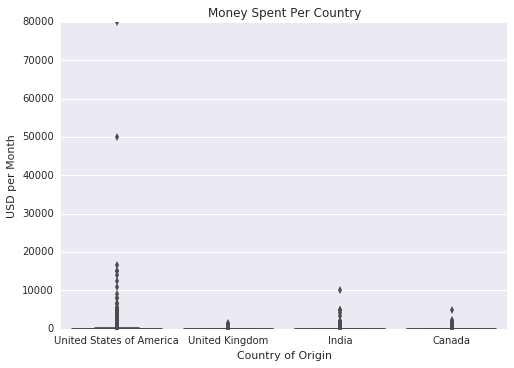

In [187]:
sns.boxplot(x='CountryLive',y='MoneyPerMonth',data=four_ctrs)
plt.title('Money Spent Per Country')
plt.xlabel('Country of Origin')
plt.ylabel('USD per Month')

The above boxplot shows manyoutliers, especially in the USA. We filter these out by limiting monthly spending to less than $100 per month.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



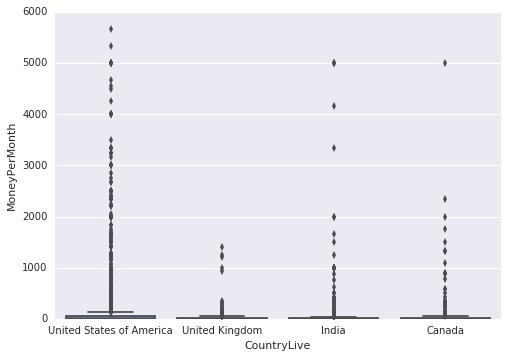

In [248]:
four_ctrs_no_out = four_ctrs[four_ctrs['MoneyPerMonth'] <= 6000]
sns.boxplot(x='CountryLive',y='MoneyPerMonth', 
            data=four_ctrs_no_out)

In [249]:
four_ctrs_no_out.groupby('CountryLive')[['MoneyPerMonth']].mean().sort_values('MoneyPerMonth',ascending=False)

,MoneyPerMonth
CountryLive,
United States of America,142.654608
India,113.748387
Canada,113.510961
United Kingdom,45.534443


Outliers were removed if no reason was found for the amount of money spent. Bootcamp participants were kept in the dataset.

Based on our results, the USA, India, Canada are all great candidates for our advertisement campaign.

In [252]:
four_ctrs_no_out['CountryLive'].value_counts()

United States of America    2920
India                        462
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

Given that the USA has the most number of respondents, and spends the most per month of our 4 countries, it is a great first candidate.

Respondents from India and Canada spent similar amounts 